In [1]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
hide_toggle()

In [2]:

import seaborn as sns
print(sns.__version__)
def add_median_labels(ax):
    import matplotlib.patheffects as path_effects

    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:.0f}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

def add_avg_labels(ax):
    import matplotlib.patheffects as path_effects

    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    
    # iterate over median lines
    for median in lines[5:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:.2f}', ha='center', va='center',
                       fontweight='bold', color='white', bbox=dict(facecolor='#445A69'))
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

hide_toggle()

0.11.2


In [185]:
def adjust_group(row):
    if not pd.isna(row["group"]):
        return row["group"]
    
    if pd.isna(row["Unnamed: 0.1"]):
        return row["Unnamed: 0"]
    
    if pd.isna(row["Unnamed: 0"]):
        return row["Unnamed: 0.1"]
    
    else:
        return row["Unnamed: 0.1"]

stats_df = pd.read_csv("stats.csv", sep=';', decimal=',', index_col=None)
preds = pd.read_csv("predictions.csv", sep=';', decimal=',', index_col=None)
#print(preds.head())
preds["group"] = preds.apply(lambda row: adjust_group(row), axis=1)
#preds = preds.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
for column in ["accuracy", "F1", "prec", "recall"]:
    preds[column] = preds[column].astype(float)
#stats_df = stats_df.drop(["Unnamed: 0.1", "Unnamed: 0.1.1"], axis=1)
stats_df = stats_df[(stats_df["n"] == 1000) &
                    (stats_df["c"].isin( [10,20,30,40,50]))]
preds = preds[(preds["n"] == 1000)&
    (preds["c"].isin( [10,20,30,40,50]))]
measures = ["Border Points (C)", "NN Error (C)", "Fishers DR (C)", "Fishers DRv (C)", "Gini (C)"]
for measure in measures:
    no_c = measure.replace(" (C)", "")
    stats_df[no_c] = stats_df[measure]
    stats_df = stats_df.drop(measure, axis=1)
stats_df.columns
print(len(stats_df))
imbalances = ["very_balanced", "balanced", "medium", "imbalanced", "very_imbalanced"]
stats_df["group_imbalance"] = pd.Categorical(stats_df["group_imbalance"], categories=imbalances, ordered=True)
stats_df["cls_imbalance"] = pd.Categorical(stats_df["cls_imbalance"], categories=imbalances, ordered=True)

#hide_toggle()

33


# Ensure Multi-Class Imbalance (C1)

## Prepare Measures to Use
Metrics: Complexity Measures from Feature Overlap (F1 and F2), and from neighborhood based (N1 - N3) and the Gini Coefficient.

Parameters: "c" and "s_C".

In [186]:
c1_parameters = ["cls_imbalance"]
c1_measures = ["Fishers DRv","Border Points", "NN Error"]
complexity_measures_df = stats_df[(stats_df["gs"] == 0.5) & (stats_df["n_group_features"] == 10) & (stats_df["group_imbalance"] == "imbalanced")]
complexity_measures_df = complexity_measures_df[c1_parameters + c1_measures]
hide_toggle()

In [187]:
c1_melt_df = complexity_measures_df.melt(c1_parameters, var_name="Complexity Measure", value_name="Value of Measure")
c1_melt_df["Value of Measure"] = c1_melt_df["Value of Measure"].astype(float)
c1_melt_df

,cls_imbalance,Complexity Measure,Value of Measure
0,medium,Fishers DRv,0.061682
1,medium,Fishers DRv,0.036024
2,very_balanced,Fishers DRv,0.029810
3,balanced,Fishers DRv,0.026775
4,imbalanced,Fishers DRv,0.055309
5,very_imbalanced,Fishers DRv,0.088429
6,medium,Border Points,0.543544
7,medium,Border Points,0.511000
8,very_balanced,Border Points,0.660000
9,balanced,Border Points,0.591000


<ipython-input-188-c427d13967c4>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Very Balanced","Balanced","Medium","Imbalanced", "Very Imbalanced"], rotation=30)


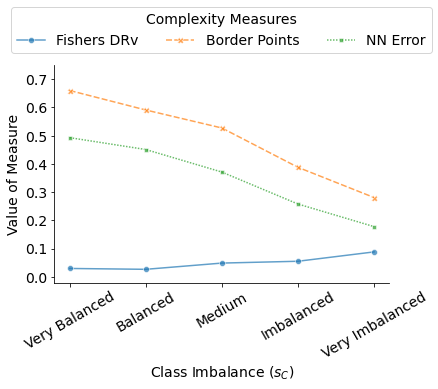

In [188]:
import matplotlib
font = {#'family' : 'normal',
        #'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
x_value = 'cls_imbalance'
plt.figure()
ax = sns.lineplot(data=c1_melt_df, x=x_value, y="Value of Measure", hue="Complexity Measure", style="Complexity Measure", ci=None, alpha=0.7, markers=True)
#ax.invert_yaxis()
plt.legend(ncol=5, loc="upper left", title="Complexity Measures", 
           labels=["Fishers DRv", "Border Points", "NN Error"], 
           bbox_to_anchor=(-0.15, 1.3)) 
ax.set_xticklabels(["Very Balanced","Balanced","Medium","Imbalanced", "Very Imbalanced"], rotation=30)
ax.set_xlabel(x_labels[x_value])
#ax.set_ylabel("Complexity Measure Value")
ax.set_ylim([-0.02,0.75])
ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
#plt.show()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(f"evaluation/Figures/C1_{x_value}_measures.pdf", bbox_inches='tight')
hide_toggle()

### Observations for Class Imbalance ($s_c$):

- Gini Koeffizient steigt. War zu erwarten, da wir zwar pro Gruppe die Class imbalance erhöhen, das sich aber eben auch auf den ganzen Datensatz auswirkt. Je nach Anzahl der Gruppen, ist es jedoch schwierig den Gini Index auf dem gesamten Datensatz sehr hoch zu bringen. Je mehr Gruppen wir haben, desto limitierter ist der Gini Koeffizient.
- Borderpoints und NN Error sinken, was logisch ist, da wir weniger Instanzen von bestimmten Klassen haben bzw. manche Klassen jetzt mehr Instanzen haben. Dadurch ergeben sich weniger Borderpoints von verschiedenen Klassen.
- Fishers DR steigt an. Das bedeutet Klassen sind leichter über Features zu separieren. Passt zu den Borderline Points!

## Gini 

In [13]:
stats_df.groupby("cls_imbalance")["Gini"].mean()

cls_imbalance
balanced           0.326481
imbalanced         0.549064
medium             0.375416
very_balanced      0.322841
very_imbalanced    0.592613
Name: Gini, dtype: float64

# Ensure Group Imbalance (C2a)

Metrics: Gini Coefficient for the groups and statistics about the number of samples and classes for the different groups.

Parameters: $s_G$.

In [121]:
# Load Gini Data 
#group_gini_df = pd.read_csv("gini_groups.csv", sep=';', decimal=',', index_col=None)
stats_df = pd.read_csv("stats.csv", sep=';', decimal=',', index_col=None)
stats_df = stats_df[(stats_df["cls_imbalance"] == "medium") & (stats_df["gs"] == 0.5) &( stats_df["n_group_features"] == 10)]
stats_df["group_imbalance"] = pd.Categorical(stats_df["group_imbalance"], categories=imbalances, ordered=True)

# Prepare Statistics
group_stats = stats_df[["min #n groups", "max #n groups", "group_imbalance"]]
stats_df["Gini (G)"]  *= 100
hide_toggle()

In [122]:
group_stats_melt = group_stats.melt(['group_imbalance'], var_name='Aggregation', value_name='#n')
group_stats_melt["group_imbalance"] = pd.Categorical(group_stats_melt["group_imbalance"], categories=["very_balanced", "balanced", "medium", "imbalanced", "very_imbalanced"], ordered=True)
hide_toggle()

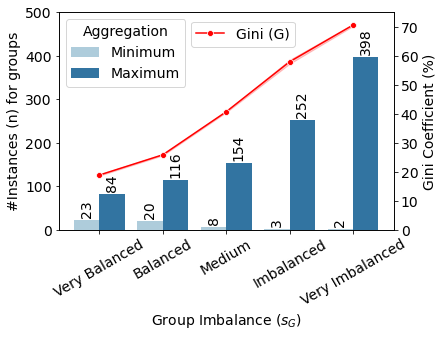

In [161]:
def show_values_on_bars(axs, rotate=False):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 12
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize="medium", rotation=90) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
import matplotlib
font = {#'family' : 'normal',
        #'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
import matplotlib.ticker as mtick

fig = plt.figure()
palette = sns.color_palette("Paired")[0:2]
ax = sns.barplot(data=group_stats_melt, x="group_imbalance", y="#n", hue="Aggregation", ci=None, palette=palette)
show_values_on_bars(ax)
ax.set_xticklabels(["Very Balanced","Balanced","Medium","Imbalanced", "Very Imbalanced"], rotation=30)
ax.set_ylabel("#Instances (n) for groups")
ax.set_ylim(0, 500)
ax.legend(labels=["Minimum", "Maximum"], title="Aggregation")
ax.set_xlabel(r"Group Imbalance ($s_G$)")
ax = plt.twinx()
ax2 = sns.lineplot(data=stats_df, x="group_imbalance", y="Gini (G)", color='r', marker="o", ax=ax, legend='brief', label="Gini (G)")
ax2.set_ylim(0, 75)
ax2.set_yticks(range(0, 80, 10))

ax2.legend(loc="upper center", bbox_to_anchor=(0.55, 0.99))
ax2.set_ylabel("Gini Coefficient (%)")
fig.savefig("evaluation/Figures/C2a_Group_imbalance.pdf", bbox_inches='tight')
hide_toggle()

# Ensurance of Group Heterogeneity (C2b)

Metrics: Complexity Measures per Group, Accuracy Difference

Parameters: GS (Group separation), missing features, #characteris. Features

In [219]:
# Load the data 
stat_heter_df = pd.read_csv("stats.csv", sep=';', decimal=',', index_col=None)
stat_heter_df = stat_heter_df[(stat_heter_df["cls_imbalance"] == "medium") & (stat_heter_df["group_imbalance"] == "imbalanced")]
# hide_toggle()
print(stat_heter_df.columns)
stat_heter_df[["Fishers DR (C)", "Fishers DR (G)", "Fishers DRv (C)", "Fishers DRv (G)","gs", "n_group_features"]]

Index(['Unnamed: 0', 'avg #n classes+groups', 'min #n classes+groups',
       'max #n classes+groups', 'avg #n groups', 'min #n groups',
       'max #n groups', 'avg #c groups', 'min #c groups', 'max #c groups',
       'Fishers DR (C)', 'Fishers DRv (C)', 'Border Points (C)',
       'NN Error (C)', 'Fishers DR (G)', 'Fishers DRv (G)',
       'Border Points (G)', 'NN Error (G)', 'Gini (C)', 'Gini (G)', 'Acc (X)',
       'Acc (G)', 'Acc (G - X)', 'n', 'n_features', 'c', 'gs',
       'features_remove_percent', 'n_group_features', 'group_imbalance',
       'cls_imbalance'],
      dtype='object')


,Fishers DR (C),Fishers DR (G),Fishers DRv (C),Fishers DRv (G),gs,n_group_features
11,0.339461,0.938934,0.061682,0.111683,0.50,10
17,0.955547,0.938934,0.079315,0.111683,0.00,10
18,0.525226,0.938934,0.043139,0.111683,0.25,10
19,0.408466,0.938934,0.036024,0.111683,0.50,10
28,0.371719,0.938934,0.033266,0.111683,0.75,10
29,0.355544,0.938934,0.032002,0.111683,1.00,10
30,0.851648,0.938934,0.048568,0.111683,0.50,1
31,0.559865,0.938934,0.039486,0.111683,0.50,5
32,0.338750,0.938934,0.035166,0.111683,0.50,15
33,0.315377,0.938934,0.033975,0.111683,0.50,20


In [235]:
c2b_parameters = ["gs", "n_group_features"]
parameter_mapping = {"gs": "Group separation (GS)", "n_group_features": "#charact. Features (CF)"}
c2b_measures = ["Fishers DRv","Border Points", "NN Error"]

for measure in c2b_measures:
    c_measure = measure + " (C)"
    stat_heter_df[c_measure] = stat_heter_df[c_measure].astype(float)
    stat_heter_df[measure] = stat_heter_df[measure + " (G)"] - stat_heter_df[c_measure]
complexity_measures_df = stat_heter_df[c2b_parameters + c2b_measures]
hide_toggle()

In [236]:
group_diff_cms_df = complexity_measures_df.melt(c2b_parameters, var_name='Measure', value_name='Measure Values')
hide_toggle()

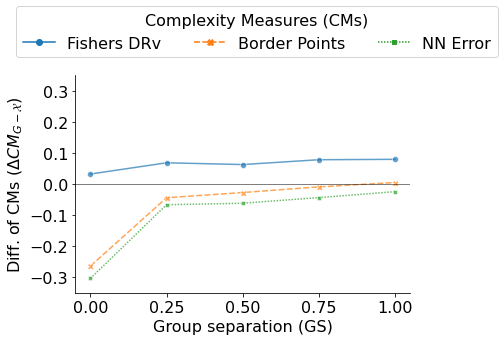

In [263]:
parameter = "gs"
plt.figure()
font = {#'family' : 'normal',
        #'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
#    group_diff_cms_df = group_diff_cms_df[(ium")]
ax = sns.lineplot(data=group_diff_cms_df[group_diff_cms_df["n_group_features"] == 10], x=parameter, y="Measure Values", hue="Measure", style="Measure", ci=None, alpha=0.7, markers=True)
ax.set_xticks(group_diff_cms_df[parameter].unique())
ax.set_xlabel(parameter_mapping[parameter])
ax.set_ylim(-0.35, 0.35)
ax.set_ylabel(r"Diff. of CMs ($\Delta CM_{G - \mathcal{X}}$)")
ax.set_yticks([-0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3])
plt.legend(bbox_to_anchor=(-0.2, 1.2), ncol=7, loc="center left", title="Complexity Measures (CMs)")
ax.axhline(y=0, color='black', linestyle='-',xmin=0, xmax=20, linewidth=0.5)
#plt.show()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(f"evaluation/Figures/C2b_{parameter}_measures.pdf", bbox_inches='tight')
hide_toggle()

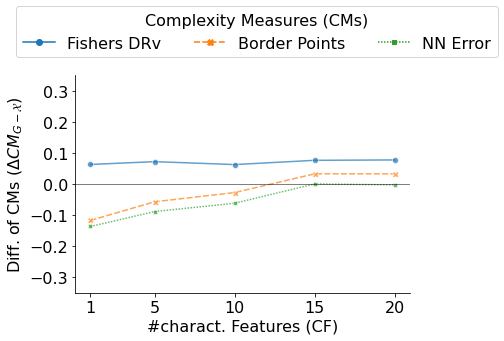

In [271]:
parameter = "n_group_features"
plt.figure()
ax = sns.lineplot(data=group_diff_cms_df[group_diff_cms_df["gs"] == 0.5], x=parameter, y="Measure Values", hue="Measure", style="Measure", ci=None, alpha=0.7, markers=True)
ax.set_xticks(group_diff_cms_df[parameter].unique())
ax.set_xlabel(parameter_mapping[parameter])
ax.set_ylim(-0.35, 0.35)
ax.set_ylabel(r"Diff. of CMs ($\Delta CM_{G - \mathcal{X}}$)")
ax.set_yticks([-0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3])
plt.legend(bbox_to_anchor=(-0.2, 1.2), ncol=7, loc="center left", title="Complexity Measures (CMs)")
ax.axhline(y=0, color='black', linestyle='-',xmin=0, xmax=20, linewidth=0.5)
#plt.show()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(f"evaluation/Figures/C2b_{parameter}_measures.pdf", bbox_inches='tight')
hide_toggle()
hide_toggle()

## Observations
- Zunächst mal ist das Durchschnitt über Gruppen, nicht (!) gewichtet nach n
- Generell: Bei gs=0 bzw. n_group_features=1, haben alle Unterschiede, d.h. Werte <> 0. Dnach steigen so gut wie alle Kurven an.
- Fishers DR klarer Trend erkennbar. Steigt an für gs/n_group_features. Interessant ist, dass bei C1 hier ein umgekehrter Trend zu erkennen war, verglichen mit Borderpoints/NN Error.
- Komisch ist, dass feature_remove_percent kein wirklicher Trend erkennbar ist. Scheint anzusteigen aber sinkt dann auch wieder.

In [265]:
acc_df = stat_heter_df[c2b_parameters + ['Acc (G)', 'Acc (X)', 'Acc (G - X)']]
acc_df = acc_df.melt(c2b_parameters, var_name='Accuracy Type', value_name='Accuracy')
hide_toggle()

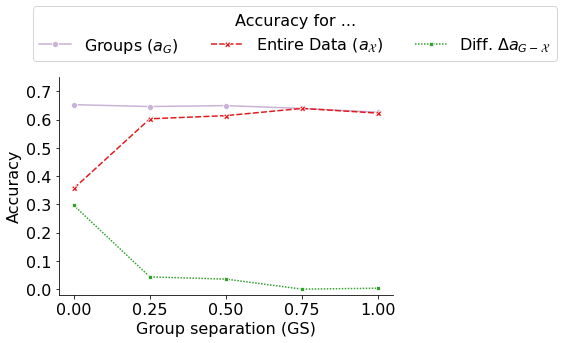

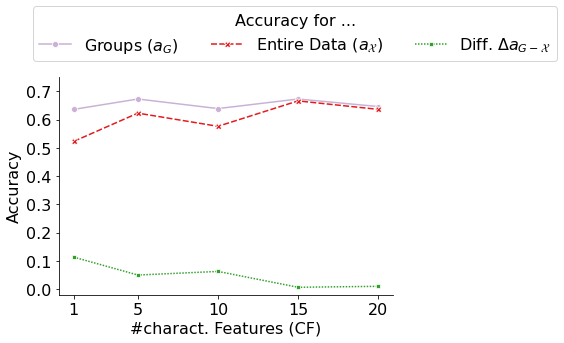

In [267]:
palette = [sns.color_palette("Paired")[8],sns.color_palette("Paired")[5], sns.color_palette("Paired")[3]]
for parameter in c2b_parameters:
    plt.figure()
    ax = sns.lineplot(data=acc_df, x=parameter, y="Accuracy", hue="Accuracy Type", style="Accuracy Type", ci=None, markers=True, palette=palette)
    ax.set_xticks(acc_df[parameter].unique())
    ax.set_ylim(-0.02, 0.75)
    ax.set_xlabel(parameter_mapping[parameter])
    ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

    ax.set_ylabel(r"Accuracy")
    plt.legend(bbox_to_anchor=(-0.1, 1.2), ncol=7, loc="center left", labels=[r"Groups ($a_G$)",  r"Entire Data ($a_{\mathcal{X}}$)", r"Diff. $\Delta a_{G - \mathcal{X}}$"], title="Accuracy for ...")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.savefig(f"evaluation/Figures/C2b_accuracy_{parameter}.pdf", bbox_inches='tight')
hide_toggle()

# Accuracy for group size

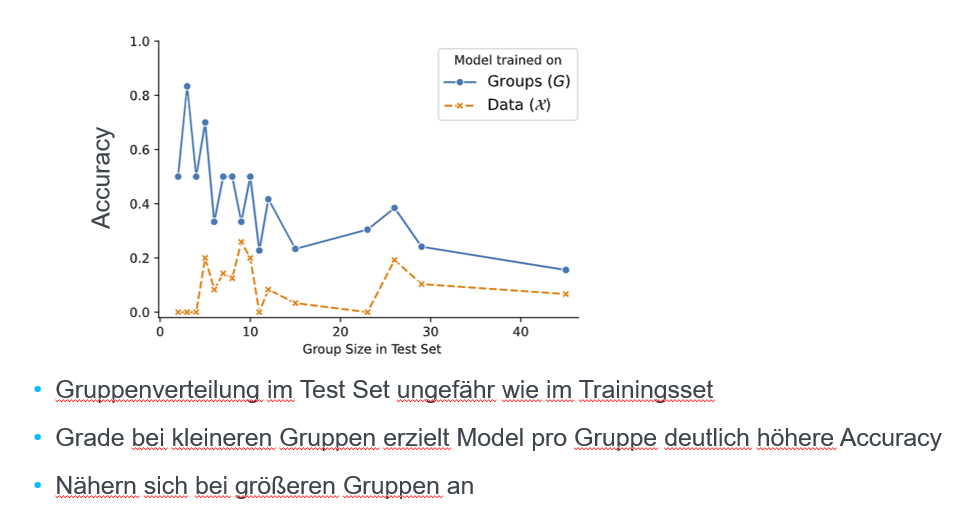